# Cleaning and Preprocessing Data for Machine Learning

In [123]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [124]:
# Read the csv file into a pandas DataFrame

citibikes_2018_spring_file = "JC-201804-citibike-tripdata.csv"
citibikes_2018_summer_file = "JC-201808-citibike-tripdata.csv"
citibikes_2018_winter_file = "JC-201812-citibike-tripdata.csv"
citibikes_2019_spring_file = "JC-201903-citibike-tripdata.csv"

citibikes_2018_spring_df = pd.read_csv(citibikes_2018_spring_file)
citibikes_2018_summer_df = pd.read_csv(citibikes_2018_summer_file)
citibikes_2018_winter_df = pd.read_csv(citibikes_2018_winter_file)
citibikes_2019_spring_df = pd.read_csv(citibikes_2019_spring_file)


In [125]:
# Combine Data File and store into Pandas DataFrame

citibikes_2018_spring_summer_df = citibikes_2018_spring_df.append(citibikes_2018_summer_df)
citibikes_2018_spring_summer_winter_df = citibikes_2018_spring_summer_df.append(citibikes_2018_winter_df)
citibikes_2018_2019_spring_df = citibikes_2018_spring_df.append(citibikes_2019_spring_df)
bikes_info_df = citibikes_2018_2019_spring_df.append(citibikes_2018_spring_summer_winter_df)
#citibikes_2018_2019_spring_df.head()
#citibikes_2018_spring_summer_winter_df.head()
#bikes_info_df

In [126]:
bikes_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135511 entries, 0 to 20204
Data columns (total 15 columns):
tripduration               135511 non-null int64
starttime                  135511 non-null object
stoptime                   135511 non-null object
start station id           135511 non-null int64
start station name         135511 non-null object
start station latitude     135511 non-null float64
start station longitude    135511 non-null float64
end station id             135511 non-null int64
end station name           135511 non-null object
end station latitude       135511 non-null float64
end station longitude      135511 non-null float64
bikeid                     135511 non-null int64
usertype                   135511 non-null object
birth year                 135511 non-null int64
gender                     135511 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 16.5+ MB


In [127]:
bikes_info = bikes_info_df.drop(columns= ["start station id", 'start station name', 'end station id', 'end station name', 'bikeid'])
bikes_info.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
0,1814,2018-04-01 09:43:51.1590,2018-04-01 10:14:06.1300,40.716247,-74.033459,40.724294,-74.035483,Subscriber,1978,1
1,298,2018-04-01 11:42:53.7090,2018-04-01 11:47:51.8770,40.716247,-74.033459,40.721124,-74.038051,Subscriber,1979,1
2,1060,2018-04-01 12:43:11.9640,2018-04-01 13:00:52.8700,40.716247,-74.033459,40.711242,-74.055701,Subscriber,1972,1
3,1035,2018-04-01 12:43:40.5890,2018-04-01 13:00:55.6620,40.716247,-74.033459,40.711242,-74.055701,Subscriber,1983,1
4,559,2018-04-01 12:56:47.4600,2018-04-01 13:06:06.7710,40.716247,-74.033459,40.728745,-74.032108,Subscriber,1989,1


In [128]:
bikes_info_clean = bikes_info.dropna(axis=0)
bikes_info_clean.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
0,1814,2018-04-01 09:43:51.1590,2018-04-01 10:14:06.1300,40.716247,-74.033459,40.724294,-74.035483,Subscriber,1978,1
1,298,2018-04-01 11:42:53.7090,2018-04-01 11:47:51.8770,40.716247,-74.033459,40.721124,-74.038051,Subscriber,1979,1
2,1060,2018-04-01 12:43:11.9640,2018-04-01 13:00:52.8700,40.716247,-74.033459,40.711242,-74.055701,Subscriber,1972,1
3,1035,2018-04-01 12:43:40.5890,2018-04-01 13:00:55.6620,40.716247,-74.033459,40.711242,-74.055701,Subscriber,1983,1
4,559,2018-04-01 12:56:47.4600,2018-04-01 13:06:06.7710,40.716247,-74.033459,40.728745,-74.032108,Subscriber,1989,1


In [129]:
bikes_info_clean.to_csv('bikes_info_clean.csv')


In [130]:
#bikes_info_clean["usertype"] = bikes_info_clean.astype(float)
#bikes_info_clean['usertype'] = pd.to_numeric(bikes_info_clean['usertype'],errors='coerce')


Training the Data

In [131]:
X = bikes_info_clean[["gender", "tripduration", "usertype","start station latitude","start station longitude"]] # add start station name # all three arent numbers so it is tokenized
y = bikes_info_clean["birth year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(135511, 5) (135511, 1)


In [133]:
data = bikes_info_clean.copy()

data_binary_encoded = pd.get_dummies(data, columns=["gender", "usertype"]) # dummy variable is a binary value over all possible catagories in a column
data_binary_encoded

,tripduration,starttime,stoptime,start station latitude,start station longitude,end station latitude,end station longitude,birth year,gender_0,gender_1,gender_2,usertype_Customer,usertype_Subscriber
0,1814,2018-04-01 09:43:51.1590,2018-04-01 10:14:06.1300,40.716247,-74.033459,40.724294,-74.035483,1978,0,1,0,0,1
1,298,2018-04-01 11:42:53.7090,2018-04-01 11:47:51.8770,40.716247,-74.033459,40.721124,-74.038051,1979,0,1,0,0,1
2,1060,2018-04-01 12:43:11.9640,2018-04-01 13:00:52.8700,40.716247,-74.033459,40.711242,-74.055701,1972,0,1,0,0,1
3,1035,2018-04-01 12:43:40.5890,2018-04-01 13:00:55.6620,40.716247,-74.033459,40.711242,-74.055701,1983,0,1,0,0,1
4,559,2018-04-01 12:56:47.4600,2018-04-01 13:06:06.7710,40.716247,-74.033459,40.728745,-74.032108,1989,0,1,0,0,1
5,232,2018-04-01 15:29:47.3040,2018-04-01 15:33:39.3650,40.716247,-74.033459,40.712419,-74.038526,1990,0,1,0,0,1
6,149,2018-04-01 15:43:48.2360,2018-04-01 15:46:17.2380,40.716247,-74.033459,40.719252,-74.034234,1988,0,1,0,0,1
7,1024,2018-04-01 15:48:56.7600,2018-04-01 16:06:01.4630,40.716247,-74.033459,40.723332,-74.045953,1969,1,0,0,1,0
8,882,2018-04-01 16:21:50.3390,2018-04-01 16:36:32.4390,40.716247,-74.033459,40.724294,-74.035483,1992,0,1,0,1,0
9,676,2018-04-01 16:46:24.8250,2018-04-01 16:57:41.3880,40.716247,-74.033459,40.721525,-74.046305,1969,1,0,0,1,0


## Scaling and Normalization

In [103]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

X_train.head()

,gender,tripduration,start station latitude,start station longitude,usertype_Customer,usertype_Subscriber
12565,1,208,40.725340,-74.067622,0,1
10169,1,2238,40.727224,-74.033759,0,1
13650,1,304,40.718489,-74.047727,0,1
6226,1,513,40.711242,-74.055701,0,1
17308,1,197,40.726012,-74.050389,0,1


### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [104]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [105]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [106]:
#try
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

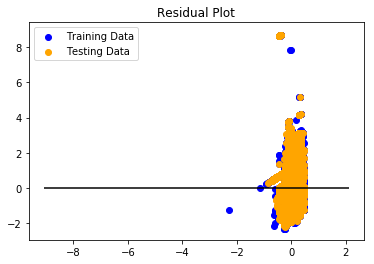

In [108]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

StandardScaler applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

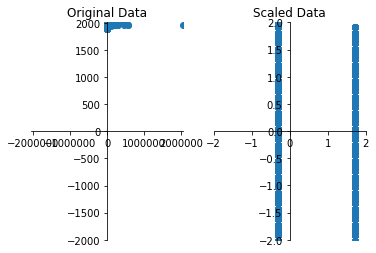

In [109]:
#working~~sh
fig1 = plt.figure()
axes1 = fig1.add_subplot(1, 2, 1)  # numrows, numcols, fignum where fignum ranges from 1 to numrows*numcols
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["tripduration"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx+1, maxx + 1)
axes1.set_ylim(-maxy+1, maxy + 10)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["tripduration"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])




In [110]:
plt.show()

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [111]:

X = pd.get_dummies(bikes_info_clean[["birth year","tripduration" ,"start station latitude","start station longitude"]])
y = bikes_info_clean["usertype"].values.reshape(-1, 1)
X.head()

,birth year,tripduration,start station latitude,start station longitude
0,1978,1814,40.716247,-74.033459
1,1979,298,40.716247,-74.033459
2,1972,1060,40.716247,-74.033459
3,1983,1035,40.716247,-74.033459
4,1989,559,40.716247,-74.033459


In [112]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,birth year,tripduration,start station latitude,start station longitude
0,1978,1814,40.716247,-74.033459
1,1979,298,40.716247,-74.033459
2,1972,1060,40.716247,-74.033459
3,1983,1035,40.716247,-74.033459
4,1989,559,40.716247,-74.033459


Step 2) Split data into training and testing data

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [114]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
classifier.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9388387630002066
Testing Data Score: 0.9392230946336856


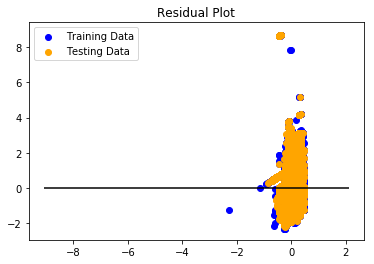

In [117]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [118]:
X.shape

(135511, 4)

Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [119]:
#WORKS
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

ValueError: could not convert string to float: 'Subscriber'

Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

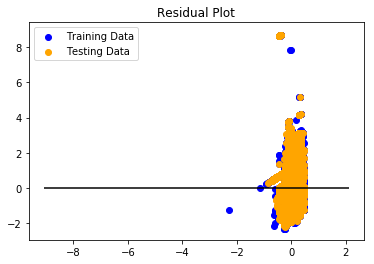

In [120]:
#WORKS
# Plot the results 
#do a logisticclassifier for binary options
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Step 5) Quantify your model using the scaled data

In [121]:
#WORKS
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.972844424016053, R2: 0.04139498291620092
